Script from Chelsey to read classifier results

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
import pickle
import glob

import AZKABANML

### Plotting settings

In [2]:

palette = sns.color_palette()
plt.style.use(['seaborn-colorblind'])
plt.rc('font', family='Arial')
SMALL_SIZE = 11
BIGGER_SIZE = 13
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.direction'] = 'inout'
plt.rcParams['ytick.direction'] = 'inout'
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['ytick.major.width'] = 1

savefigs_path = 'C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/AZKABAN-light/ZoopMix_paper/Figs/'

one_col = 85 *0.0393701
two_col = 170*0.0393701

### Read results for any classifier

In [3]:
path = r'F:/AFKABAN/Classify'

In [4]:
def read_results(classifier,classifypath):
    ' read the classifier results and predictions from the selected classifier'
    
    main_path = f'{path}/{classifier}'
    cv_path = '_NestedCV.pkl'
    best_params = '_BestParams.pkl'

    # Load dataframes
    cv_df = pd.read_pickle(main_path + cv_path) # Nested CV results
    best_params = pd.read_pickle(main_path + best_params)

    return {'name':classifier, 'cv_df':cv_df, 'best_params':best_params}

# Read results

#### kNN

In [5]:
kNN_120 = AZKABANML.read_results('kNN_08-05-2023_120_balanced',path)
kNN_200 = AZKABANML.read_results('kNN_08-05-2023_200_balanced',path)

kNN_120_minmax= AZKABANML.read_results('kNN_10-05-2023_120_minmax',path)
kNN_200_minmax = AZKABANML.read_results('kNN_10-05-2023_200_minmax',path)

kNN_120_sigbs= AZKABANML.read_results('kNN_08-05-2023_120_sigbs',path)
kNN_200_sigbs = AZKABANML.read_results('kNN_08-05-2023_200_sigbs',path)

kNN_120_norm= AZKABANML.read_results('kNN_06-06-2023_120_norm',path)
kNN_200_norm = AZKABANML.read_results('kNN_06-06-2023_200_norm',path)



#### LightGBM

In [53]:
lightGBM_120 = AZKABANML.read_results('lightGBM_08-05-2023_120_balanced',path)
lightGBM_200 = AZKABANML.read_results('lightGBM_08-05-2023_200_balanced',path)

lightGBM_120_minmax = AZKABANML.read_results('lightGBM_23-05-2023_120_minmax',path)
lightGBM_200_minmax = AZKABANML.read_results('lightGBM_23-05-2023_200_minmax',path)


lightGBM_120_norm = AZKABANML.read_results('lightGBM_06-06-2023_120_norm',path)
lightGBM_200_norm = AZKABANML.read_results('lightGBM_06-06-2023_200_norm',path)

#### SVC

In [65]:
SVC_120 = AZKABANML.read_results('SVC_08-05-2023_120_balanced',path)
SVC_200 = AZKABANML.read_results('SVC_08-05-2023_200_balanced',path)

SVC_120_minmax = AZKABANML.read_results('SVC_23-05-2023_120_minmax',path)
SVC_200_minmax = AZKABANML.read_results('SVC_23-05-2023_200_minmax',path)

SVC_120_norm = AZKABANML.read_results('SVC_06-06-2023_120_norm',path)
SVC_200_norm = AZKABANML.read_results('SVC_06-06-2023_200_norm',path)

#### gNB

In [55]:
gNB_120 = read_results('gNB_02-05-2023_120',path)
gNB_200 = read_results('gNB_02-05-2023_200',path)

# Model Parameters

## Print best params

In [72]:
lightGBM_120_norm['best_params']['learner']

LGBMClassifier(boosting_type='goss', colsample_bytree=0.7809633132836477,
               learning_rate=0.017215392284894805, max_delta_step=0,
               max_depth=7, min_child_weight=2, n_estimators=4600,
               num_leaves=28, objective='binary',
               reg_alpha=0.0009712999580650016, reg_lambda=2.0454429537368877,
               scale_pos_weight=1, seed=4, subsample=0.5855450214468267)

In [57]:
SVC_120_minmax['best_params']

{'learner': SVC(C=1.7478498299796177, coef0=0.7712015894592644,
     decision_function_shape='ovo', degree=5, kernel='poly', random_state=4,
     tol=0.00021721347685542503),
 'preprocs': (MinMaxScaler(feature_range=(0.0, 1.0)),),
 'ex_preprocs': ()}

In [58]:
kNN_120['cv_df']

,Outer_fold,Outer_score,Outer_unweighted_scores,Outer_unweighted_score_labels,Outer_confusion_matrix,Outer_training_duration,Trial,Trial_loss,Trial_duration
0,0,0.985644,"[0.9781021897810219, 1.0, 0.9787234042553192]","[Atlantic cod, Northern shrimp, Polar cod]","[[67, 0, 2], [0, 70, 0], [1, 0, 69]]",234.161575,0,0.135394,2.002759
1,0,0.985644,"[0.9781021897810219, 1.0, 0.9787234042553192]","[Atlantic cod, Northern shrimp, Polar cod]","[[67, 0, 2], [0, 70, 0], [1, 0, 69]]",234.161575,1,0.070362,1.586058
2,0,0.985644,"[0.9781021897810219, 1.0, 0.9787234042553192]","[Atlantic cod, Northern shrimp, Polar cod]","[[67, 0, 2], [0, 70, 0], [1, 0, 69]]",234.161575,2,0.030384,1.682025
3,0,0.985644,"[0.9781021897810219, 1.0, 0.9787234042553192]","[Atlantic cod, Northern shrimp, Polar cod]","[[67, 0, 2], [0, 70, 0], [1, 0, 69]]",234.161575,3,0.088486,0.266424
4,0,0.985644,"[0.9781021897810219, 1.0, 0.9787234042553192]","[Atlantic cod, Northern shrimp, Polar cod]","[[67, 0, 2], [0, 70, 0], [1, 0, 69]]",234.161575,4,0.054371,0.277154
...,...,...,...,...,...,...,...,...,...
495,9,0.990382,"[0.9859154929577464, 1.0, 0.9852941176470589]","[Atlantic cod, Northern shrimp, Polar cod]","[[70, 0, 0], [0, 69, 0], [2, 0, 67]]",238.915716,45,0.036228,0.266553
496,9,0.990382,"[0.9859154929577464, 1.0, 0.9852941176470589]","[Atlantic cod, Northern shrimp, Polar cod]","[[70, 0, 0], [0, 69, 0], [2, 0, 67]]",238.915716,46,0.043687,0.255381
497,9,0.990382,"[0.9859154929577464, 1.0, 0.9852941176470589]","[Atlantic cod, Northern shrimp, Polar cod]","[[70, 0, 0], [0, 69, 0], [2, 0, 67]]",238.915716,47,0.104422,0.303215
498,9,0.990382,"[0.9859154929577464, 1.0, 0.9852941176470589]","[Atlantic cod, Northern shrimp, Polar cod]","[[70, 0, 0], [0, 69, 0], [2, 0, 67]]",238.915716,48,0.016516,0.209950


# Nested Cross-Validation

## Print F1 score results

### Compare algorithms

#### 120 kHz

In [59]:
classifier_list = [kNN_120, lightGBM_120, SVC_120, gNB_120]
for class_i in classifier_list:
    print('\nClassifier: '+class_i['name'])
    AZKABANML.print_F1_mean(class_i)


Classifier: kNN_08-05-2023_120_balanced
Mean class-weighted F1 score for : 0.99 ± 0.0
Mean F1 score for Atlantic cod: 0.98 ± 0.01
Mean F1 score for Northern shrimp: 1.0 ± 0.0
Mean F1 score for Polar cod: 0.98 ± 0.01

Classifier: lightGBM_08-05-2023_120_balanced
Mean class-weighted F1 score for : 0.99 ± 0.01
Mean F1 score for Atlantic cod: 0.99 ± 0.01
Mean F1 score for Northern shrimp: 1.0 ± 0.0
Mean F1 score for Polar cod: 0.99 ± 0.01

Classifier: SVC_08-05-2023_120_balanced
Mean class-weighted F1 score for : 0.98 ± 0.01
Mean F1 score for Atlantic cod: 0.98 ± 0.02
Mean F1 score for Northern shrimp: 1.0 ± 0.0
Mean F1 score for Polar cod: 0.98 ± 0.02

Classifier: gNB_02-05-2023_120
Mean class-weighted F1 score for : 0.88 ± 0.04
Mean F1 score for Atlantic cod: 0.87 ± 0.05
Mean F1 score for Northern shrimp: 1.0 ± 0.0
Mean F1 score for Polar cod: 0.86 ± 0.05


##### 200 kHz

In [60]:
classifier_list = [kNN_200, lightGBM_200, SVC_200, gNB_200]
for class_i in classifier_list:
    print('\nClassifier: '+class_i['name'])
    AZKABANML.print_F1_mean(class_i)


Classifier: kNN_08-05-2023_200_balanced
Mean class-weighted F1 score for : 0.99 ± 0.0
Mean F1 score for Atlantic cod: 0.98 ± 0.01
Mean F1 score for Northern shrimp: 1.0 ± 0.0
Mean F1 score for Polar cod: 0.98 ± 0.01

Classifier: lightGBM_08-05-2023_200_balanced
Mean class-weighted F1 score for : 0.99 ± 0.0
Mean F1 score for Atlantic cod: 0.99 ± 0.01
Mean F1 score for Northern shrimp: 1.0 ± 0.0
Mean F1 score for Polar cod: 0.98 ± 0.01

Classifier: SVC_08-05-2023_200_balanced
Mean class-weighted F1 score for : 0.98 ± 0.01
Mean F1 score for Atlantic cod: 0.97 ± 0.01
Mean F1 score for Northern shrimp: 1.0 ± 0.01
Mean F1 score for Polar cod: 0.97 ± 0.02

Classifier: gNB_02-05-2023_200
Mean class-weighted F1 score for : 0.78 ± 0.03
Mean F1 score for Atlantic cod: 0.68 ± 0.05
Mean F1 score for Northern shrimp: 1.0 ± 0.0
Mean F1 score for Polar cod: 0.74 ± 0.04


LightGBM and SVC are equally good, slightly better than kNN. gNB is worst, will not repeat.

Better results with 120 for the poorer performing algorithms (kNN and gNB)

## Compare preprocessing (any), sigbs, balanced

In [61]:
classifier_list = [kNN_120_sigbs, kNN_120, kNN_120_norm,kNN_120_minmax]
for class_i in classifier_list:
    print('\nClassifier: '+class_i['name'])
    AZKABANML.print_F1_mean(class_i)


Classifier: kNN_08-05-2023_120_sigbs
Mean class-weighted F1 score for : 0.99 ± 0.01
Mean F1 score for Atlantic cod: 0.98 ± 0.01
Mean F1 score for Northern shrimp: 1.0 ± 0.0
Mean F1 score for Polar cod: 0.98 ± 0.01

Classifier: kNN_08-05-2023_120_balanced
Mean class-weighted F1 score for : 0.99 ± 0.0
Mean F1 score for Atlantic cod: 0.98 ± 0.01
Mean F1 score for Northern shrimp: 1.0 ± 0.0
Mean F1 score for Polar cod: 0.98 ± 0.01

Classifier: kNN_06-06-2023_120_norm
Mean class-weighted F1 score for : 0.96 ± 0.01
Mean F1 score for Atlantic cod: 0.95 ± 0.02
Mean F1 score for Northern shrimp: 0.99 ± 0.01
Mean F1 score for Polar cod: 0.94 ± 0.02

Classifier: kNN_10-05-2023_120_minmax
Mean class-weighted F1 score for : 0.99 ± 0.01
Mean F1 score for Atlantic cod: 0.98 ± 0.01
Mean F1 score for Northern shrimp: 1.0 ± 0.0
Mean F1 score for Polar cod: 0.98 ± 0.01


In [6]:
classifier_list = [kNN_200_sigbs, kNN_200, kNN_200_norm,kNN_200_minmax]
for class_i in classifier_list:
    print('\nClassifier: '+class_i['name'])
    AZKABANML.print_F1_mean(class_i)


Classifier: kNN_08-05-2023_200_sigbs
Mean class-weighted F1 score for : 0.99 ± 0.01
Mean F1 score for Atlantic cod: 0.98 ± 0.01
Mean F1 score for Northern shrimp: 1.0 ± 0.0
Mean F1 score for Polar cod: 0.98 ± 0.01

Classifier: kNN_08-05-2023_200_balanced
Mean class-weighted F1 score for : 0.99 ± 0.0
Mean F1 score for Atlantic cod: 0.98 ± 0.01
Mean F1 score for Northern shrimp: 1.0 ± 0.0
Mean F1 score for Polar cod: 0.98 ± 0.01

Classifier: kNN_06-06-2023_200_norm
Mean class-weighted F1 score for : 0.97 ± 0.01
Mean F1 score for Atlantic cod: 0.98 ± 0.01
Mean F1 score for Northern shrimp: 0.97 ± 0.01
Mean F1 score for Polar cod: 0.95 ± 0.02

Classifier: kNN_10-05-2023_200_minmax
Mean class-weighted F1 score for : 0.99 ± 0.01
Mean F1 score for Atlantic cod: 0.98 ± 0.01
Mean F1 score for Northern shrimp: 1.0 ± 0.0
Mean F1 score for Polar cod: 0.98 ± 0.01


In [67]:
classifier_list = [kNN_120_norm, lightGBM_120_norm, SVC_120_norm]
for class_i in classifier_list:
    print('\nClassifier: '+class_i['name'])
    AZKABANML.print_F1_mean(class_i)


Classifier: kNN_06-06-2023_120_norm
Mean class-weighted F1 score for : 0.96 ± 0.01
Mean F1 score for Atlantic cod: 0.95 ± 0.02
Mean F1 score for Northern shrimp: 0.99 ± 0.01
Mean F1 score for Polar cod: 0.94 ± 0.02

Classifier: SVC_06-06-2023_120_norm
Mean class-weighted F1 score for : 0.97 ± 0.02
Mean F1 score for Atlantic cod: 0.96 ± 0.02
Mean F1 score for Northern shrimp: 0.99 ± 0.01
Mean F1 score for Polar cod: 0.95 ± 0.03

Classifier: lightGBM_06-06-2023_120_norm
Mean class-weighted F1 score for : 0.97 ± 0.01
Mean F1 score for Atlantic cod: 0.96 ± 0.02
Mean F1 score for Northern shrimp: 0.99 ± 0.01
Mean F1 score for Polar cod: 0.95 ± 0.02


In [68]:
classifier_list = [kNN_200_norm, lightGBM_200_norm, lightGBM_200_norm]
for class_i in classifier_list:
    print('\nClassifier: '+class_i['name'])
    AZKABANML.print_F1_mean(class_i)


Classifier: kNN_06-06-2023_200_norm
Mean class-weighted F1 score for : 0.97 ± 0.01
Mean F1 score for Atlantic cod: 0.98 ± 0.01
Mean F1 score for Northern shrimp: 0.97 ± 0.01
Mean F1 score for Polar cod: 0.95 ± 0.02

Classifier: lightGBM_06-06-2023_200_norm
Mean class-weighted F1 score for : 0.97 ± 0.01
Mean F1 score for Atlantic cod: 0.98 ± 0.01
Mean F1 score for Northern shrimp: 0.98 ± 0.01
Mean F1 score for Polar cod: 0.96 ± 0.01

Classifier: lightGBM_06-06-2023_200_norm
Mean class-weighted F1 score for : 0.97 ± 0.01
Mean F1 score for Atlantic cod: 0.98 ± 0.01
Mean F1 score for Northern shrimp: 0.98 ± 0.01
Mean F1 score for Polar cod: 0.96 ± 0.01


Improvement of ~0.2 on the Mean class-weighted F1 score with preprocessing (any.)

## Print mesocosm detection values

## Plot confusion matrix

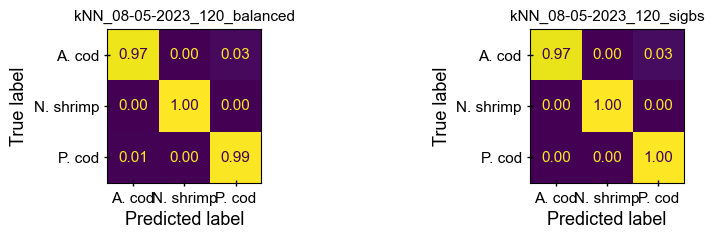

In [47]:
classifier_list = [kNN_120, kNN_120_sigbs]
fig,ax = plt.subplots(1,2,figsize=(10,2))
axes = ax.flatten()
labels = ['A. cod', 'N. shrimp','P. cod',]
i=0
for class_i in classifier_list:
    cmp = ConfusionMatrixDisplay(class_i['cv_df'].Outer_confusion_matrix.mean()/69.5,
                             display_labels=labels)
    cmp.plot(ax=axes[i], colorbar=False, values_format='.2f')
    axes[i].set(title=class_i['name']);
    i += 1

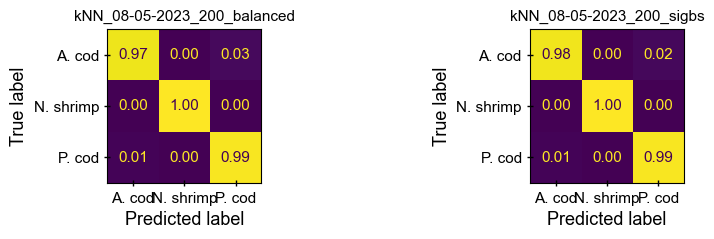

In [48]:
classifier_list = [kNN_200, kNN_200_sigbs]
fig,ax = plt.subplots(1,2,figsize=(10,2))
axes = ax.flatten()
labels = ['A. cod', 'N. shrimp','P. cod',]
i=0
for class_i in classifier_list:
    cmp = ConfusionMatrixDisplay(class_i['cv_df'].Outer_confusion_matrix.mean()/69.9,
                             display_labels=labels)
    cmp.plot(ax=axes[i], colorbar=False, values_format='.2f')
    axes[i].set(title=class_i['name']);
    i += 1

Observations:
- normalized confusion matrix
- In all algorithms some Atlantic cod are being classified as Polar cod. More in kNN, less  with lightGBM

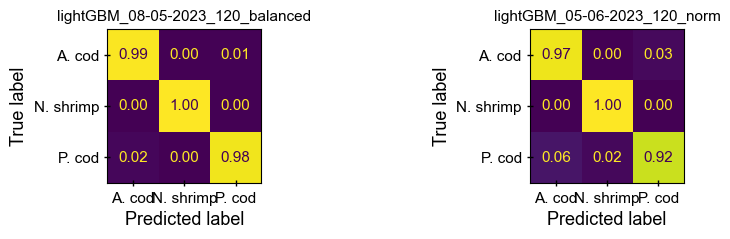

In [50]:
classifier_list = [lightGBM_120, lightGBM_120_norm]
fig,ax = plt.subplots(1,2,figsize=(10,2))
axes = ax.flatten()
labels = ['A. cod', 'N. shrimp','P. cod',]
i=0
for class_i in classifier_list:
    cmp = ConfusionMatrixDisplay(class_i['cv_df'].Outer_confusion_matrix.mean()/69.5,
                             display_labels=labels)
    cmp.plot(ax=axes[i], colorbar=False, values_format='.2f')
    axes[i].set(title=class_i['name']);
    i += 1

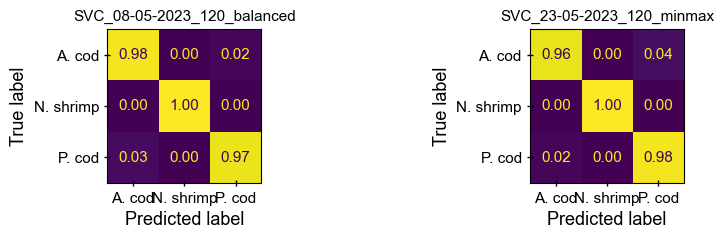

In [52]:
classifier_list = [SVC_120, SVC_120_minmax]
fig,ax = plt.subplots(1,2,figsize=(10,2))
axes = ax.flatten()
labels = ['A. cod', 'N. shrimp','P. cod',]
i=0
for class_i in classifier_list:
    cmp = ConfusionMatrixDisplay(class_i['cv_df'].Outer_confusion_matrix.mean()/69.5,
                             display_labels=labels)
    cmp.plot(ax=axes[i], colorbar=False, values_format='.2f')
    axes[i].set(title=class_i['name']);
    i += 1